In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline


In [112]:
csv_file = 'F:\PyCharm\Data Visualization\GR_Crash_Data\CGR_Crash_Data.csv'
df = pd.read_csv(csv_file)
df = df[['X', 'Y', 'BIKE', 'CRASHDATE', 'CRASHTYPE', 'DAYOFMONTH', 'DAYOFWEEK', 'DRIVER1AGE', 'D1DRINKIN',
         'DRIVER1AGE', 'DRIVER1SEX', 'INTERNAME', 'LIGHTING', 'HITANDRUN', 'HOUR', 'MONTH',
         'MOTORCYCLE', 'PRNAME', 'YEAR', 'SURFCOND', 'SPEEDLIMIT', 'TRAFCTLDEV', 'WEATHER']]
df


,X,Y,BIKE,CRASHDATE,CRASHTYPE,DAYOFMONTH,DAYOFWEEK,DRIVER1AGE,D1DRINKIN,DRIVER1AGE,...,HITANDRUN,HOUR,MONTH,MOTORCYCLE,PRNAME,YEAR,SURFCOND,SPEEDLIMIT,TRAFCTLDEV,WEATHER
0,-85.650003,42.919854,No,2008/06/16,Backing,16,Monday,31,No,31,...,No,8,June,No,LINDEN,2008,Dry,25,Stop Sign,Clear
1,-85.625665,42.924710,No,2008/08/30,Fixed Object,30,Saturday,999,No,999,...,Yes,15,August,No,LOUISE,2008,Dry,25,None,Clear
2,-85.655282,43.000972,No,2008/02/13,Other Driveway,13,Wednesday,999,No,999,...,Yes,8,February,No,JULIA,2008,Snowy,25,None,Clear
3,-85.643314,42.928172,No,2008/01/25,Angle Straight,25,Friday,23,No,23,...,No,17,January,No,BLAIM,2008,Slush,25,Yield Sign,Cloudy
4,-85.665571,42.968854,No,2008/09/26,Backing,26,Friday,37,No,37,...,No,17,September,No,CRESENT,2008,Dry,25,None,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74304,-85.688410,42.997895,No,2017/03/20,Other Driveway,20,Monday,62,No,62,...,No,16,March,No,ALPINE,2017,Dry,30,None,Clear
74305,-85.661670,42.941360,No,2017/11/18,Pedestrian,18,Saturday,59,No,59,...,No,18,November,No,HALL,2017,Wet,30,None,Rain
74306,-85.661243,42.939724,No,2017/06/02,Side-Swipe Same,2,Friday,19,No,19,...,No,19,June,Yes,LAFAYETTE,2017,Dry,25,None,Clear
74307,-85.584837,42.971042,No,2017/08/23,Pedestrian,23,Wednesday,34,Yes,34,...,No,19,August,No,MICHIGAN,2017,Dry,25,None,Clear


In [113]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74309 entries, 0 to 74308
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           74309 non-null  float64
 1   Y           74309 non-null  float64
 2   BIKE        74309 non-null  object 
 3   CRASHDATE   74309 non-null  object 
 4   CRASHTYPE   74309 non-null  object 
 5   DAYOFMONTH  74309 non-null  int64  
 6   DAYOFWEEK   74309 non-null  object 
 7   DRIVER1AGE  74309 non-null  int64  
 8   D1DRINKIN   74309 non-null  object 
 9   DRIVER1AGE  74309 non-null  int64  
 10  DRIVER1SEX  74309 non-null  object 
 11  INTERNAME   74309 non-null  object 
 12  LIGHTING    74309 non-null  object 
 13  HITANDRUN   74309 non-null  object 
 14  HOUR        74309 non-null  int64  
 15  MONTH       74309 non-null  object 
 16  MOTORCYCLE  74309 non-null  object 
 17  PRNAME      74309 non-null  object 
 18  YEAR        74309 non-null  int64  
 19  SURFCOND    74309 non-nul

In [114]:
map = folium.Map(location=[42.96, -85.67], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = df[['Y', 'X']][df['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [115]:
df['SURFCOND'].value_counts().to_frame('count')

,count
Dry,46538
Wet,14511
Snowy,6162
Icy,5187
Slush,981
Other,645
Unknown,131
Uncoded & Errors,87
Debris,30
"Mud, Dirt, Gravel",22


In [116]:
df['LIGHTING'].value_counts().to_frame('count')

,count
Daylight,49684
"Dark, Lighted",17371
"Dark, Unlighted",2620
Dusk,1853
Dawn,1773
Unknown,929
Uncoded & Errors,64
Other,15


In [117]:
df['SPEEDLIMIT'].value_counts().to_frame('count')

,count
25,29900
70,9627
35,9101
30,8749
45,6913
55,4556
40,2006
65,1634
99,786
50,402


In [118]:
df['CRASHTYPE'].value_counts().to_frame('count')

,count
Rear End Straight,21746
Side-Swipe Same,11214
Angle Straight,8703
Fixed Object,7276
Misc. Multiple Vehicle,4141
Angle Turn,2907
Backing,2179
Parking,2166
Angle Driveway,2135
Side-Swipe Opposite,1583


In [119]:
df['MONTH'].value_counts().to_frame('count')

,count
December,7502
January,7415
October,7086
February,7012
September,6252
November,6090
May,5710
August,5673
March,5651
June,5483


In [120]:
df['DAYOFWEEK'].value_counts().to_frame('count')

,count
Friday,12546
Wednesday,11929
Thursday,11439
Tuesday,10974
Monday,10442
Saturday,9739
Sunday,7240


In [121]:
df['TRAFCTLDEV'].value_counts().to_frame('count')

,count
None,42368
Signal,21348
Stop Sign,8624
Yield Sign,1015
Uncoded & Errors,923
Stop Sign with Flashing Beacon,31


In [122]:
df['WEATHER'].value_counts().to_frame('count')

,count
Clear,36888
Cloudy,19914
Snow,8050
Rain,8048
Unknown,894
Sleet or Hail,185
Fog,162
Severe Crosswind,81
Blowing Snow,54
Uncoded & Errors,31


In [123]:
df[ df["HOUR"] <= 24 ].to_csv("HOUR.csv", index=False)
df2 = pd.read_csv('HOUR.csv')

df2['HOUR'].value_counts().to_frame('count')
# df['HOUR'].value_counts().to_frame('count')

,count
17,6607
15,6046
16,6041
14,4871
12,4418
13,4289
18,4221
8,4006
7,3623
11,3597


In [124]:
df2 = df2.replace('U', np.nan).dropna()
df2['DRIVER1SEX'].value_counts().to_frame('count')

,count
M,36006
F,30748


In [125]:
df2['MOTORCYCLE'].value_counts().to_frame('count')

,count
No,66072
Yes,682


In [126]:
df2['INTERNAME'].value_counts().to_frame('count')

,count
LEONARD,2326
BURTON,2078
EASTERN,1550
WEALTHY,1507
FULLER,1442
...,...
EVANSELINE,1
044B,1
PLASTER,1
CENTRAL PARKWAY,1


In [127]:
df2['PRNAME'].value_counts().to_frame('count')

,count
BELTLINE,3843
28TH,3536
LEONARD,2746
BURTON,2301
FULLER,2190
...,...
CACSCADE,1
MCHIGAN,1
EB 1-196,1
EASTELN,1


In [128]:
df2['YEAR'].value_counts().to_frame('count')

,count
2017,7963
2016,7648
2015,7176
2014,6947
2013,6706
2008,6342
2011,6259
2012,6213
2010,5752
2009,5748


In [129]:
df2['D1DRINKIN'].value_counts().to_frame('count')

,count
No,64078
Yes,2676


In [130]:
df2[df2['DRIVER1AGE'] < 999].to_csv('AGE.csv', index=False)
df3 = pd.read_csv('AGE.csv')
df3['DRIVER1AGE'].value_counts().to_frame('count')

,count
21,2851
22,2698
23,2648
20,2611
19,2433
...,...
0,2
3,1
2,1
97,1


In [131]:
df3['DRIVER1AGE'].describe()

count    65172.000000
mean        36.782744
std         16.330187
min          0.000000
25%         23.000000
50%         32.000000
75%         48.000000
max         99.000000
Name: DRIVER1AGE, dtype: float64

In [132]:
df3['HITANDRUN'].value_counts().to_frame('count')

,count
No,57379
Yes,7793


In [133]:
df.isna().sum()

X             0
Y             0
BIKE          0
CRASHDATE     0
CRASHTYPE     0
DAYOFMONTH    0
DAYOFWEEK     0
DRIVER1AGE    0
D1DRINKIN     0
DRIVER1AGE    0
DRIVER1SEX    0
INTERNAME     0
LIGHTING      0
HITANDRUN     0
HOUR          0
MONTH         0
MOTORCYCLE    0
PRNAME        0
YEAR          0
SURFCOND      0
SPEEDLIMIT    0
TRAFCTLDEV    0
WEATHER       0
dtype: int64

In [134]:
df.duplicated().sum()

26

In [144]:
data_clean = df[['X', 'Y', 'BIKE', 'CRASHDATE', 'CRASHTYPE', 'DAYOFMONTH', 'DAYOFWEEK', 'D1DRINKIN',
                'DRIVER1AGE', 'DRIVER1SEX', 'INTERNAME', 'LIGHTING', 'HITANDRUN',
                'HOUR', 'MONTH', 'MOTORCYCLE', 'PRNAME', 'YEAR', 'SURFCOND', 'SPEEDLIMIT',
                'TRAFCTLDEV', 'WEATHER']]

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74309 entries, 0 to 74308
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           74309 non-null  float64
 1   Y           74309 non-null  float64
 2   BIKE        74309 non-null  object 
 3   CRASHDATE   74309 non-null  object 
 4   CRASHTYPE   74309 non-null  object 
 5   DAYOFMONTH  74309 non-null  int64  
 6   DAYOFWEEK   74309 non-null  object 
 7   D1DRINKIN   74309 non-null  object 
 8   DRIVER1AGE  74309 non-null  int64  
 9   DRIVER1AGE  74309 non-null  int64  
 10  DRIVER1SEX  74309 non-null  object 
 11  INTERNAME   74309 non-null  object 
 12  LIGHTING    74309 non-null  object 
 13  HITANDRUN   74309 non-null  object 
 14  HOUR        74309 non-null  int64  
 15  MONTH       74309 non-null  object 
 16  MOTORCYCLE  74309 non-null  object 
 17  PRNAME      74309 non-null  object 
 18  YEAR        74309 non-null  int64  
 19  SURFCOND    74309 non-nul

In [136]:
data_clean.replace('Uncoded & Errors', np.nan, inplace=True)
data_clean.replace('Unknown', np.nan, inplace=True)

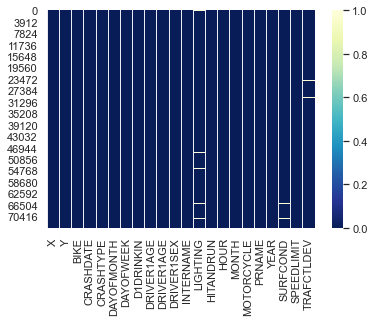

In [137]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [138]:
data_clean.dropna(axis=0, inplace=True)

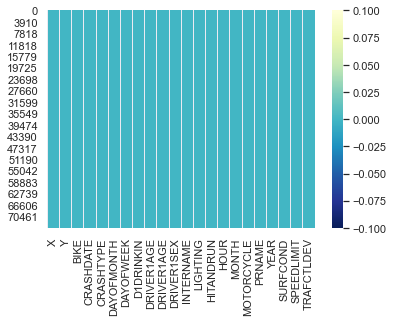

In [139]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

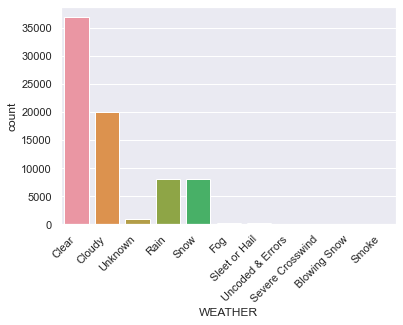

In [145]:
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
plt.show()


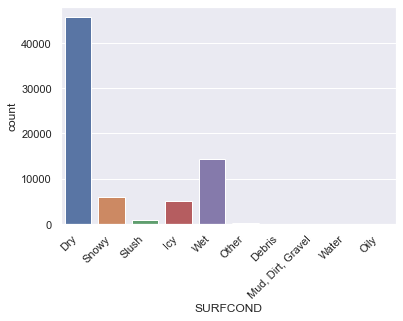

In [140]:
ax = sns.countplot(data_clean['SURFCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
plt.show()

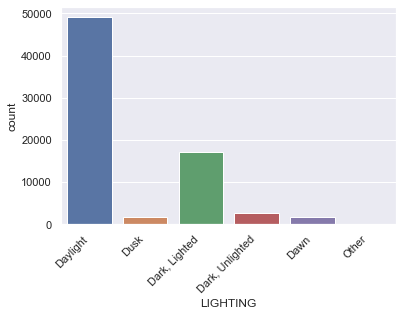

In [141]:
ax = sns.countplot(data_clean['LIGHTING'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
plt.show()

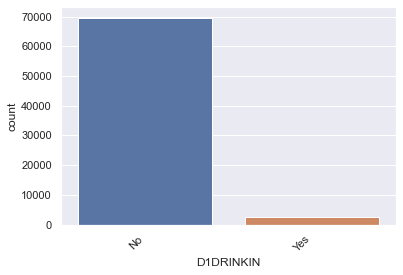

In [142]:
ax = sns.countplot(data_clean['D1DRINKIN'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
plt.show()

In [147]:
# ax = sns.countplot(data_clean['DRIVER1AGE'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
#                    horizontalalignment='right')
# plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().